In [2]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic_train.csv')
df.head(5)

,serial no,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survived is the target

passenger id,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin and Embarked

# EDA

In [4]:
#Dropping unnessary columns
df=df.drop(columns=["serial no","PassengerId","Name"])

In [5]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


categorical data are:

1.target

2.Pclass	

3.Sex

4.SibSp

5.Parch

6.Embarked



In [6]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare have 891 counts

Age has 714 counts

Cabin has 204 counts

Embarked has 889 counts

Since Ticket has 681 unique values so dropping it, If i keep ticket, then cannot apply get_dummies and can only apply label encoding.Hence dropping the ticket column

In [12]:
#Dropping the ticket column
df.drop(columns=["Ticket"],inplace=True)

In [13]:
#checking null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [15]:
#filling age Nan value with mean
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [16]:
# Since 687 out of the 891 data is missing, it will be better if we dropped it
df.drop(columns=["Cabin"],inplace=True)

In [17]:
#filling embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [18]:
#checking null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
#Encoding the columns
df = pd.get_dummies (df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


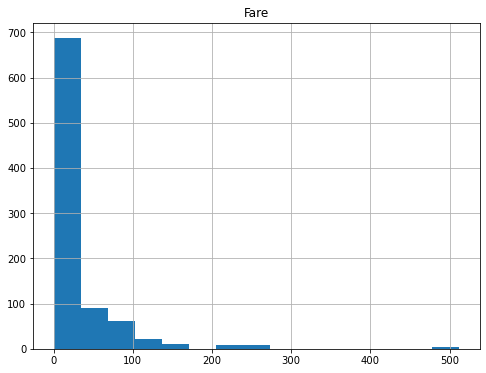

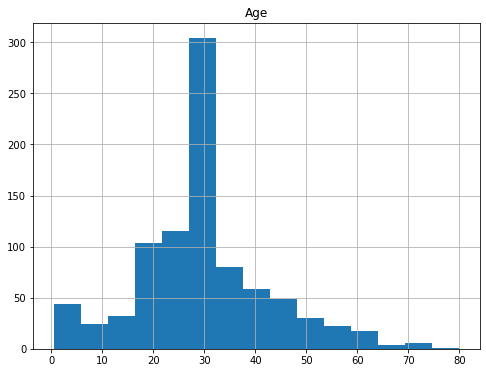

In [21]:
#checking if outliers present in age and fare
df['Fare'].hist(figsize=(8,6),bins = 15)
plt.title("Fare")
plt.show()

df['Age'].hist(figsize=(8,6),bins = 15)
plt.title("Age")
plt.show()


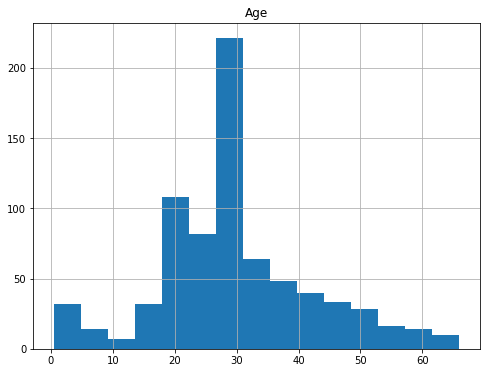

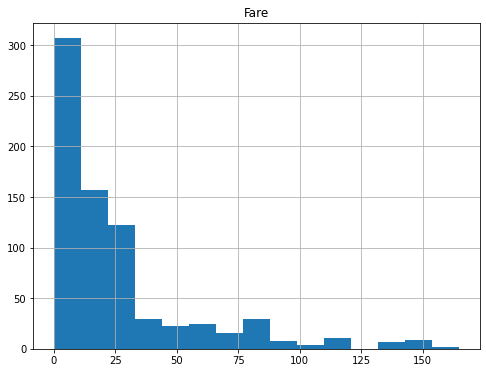

In [22]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

#plotting age without outliers
df_new['Age'].hist(figsize=(8,6),bins = 15)
plt.title("Age")
plt.show()

#plotting fare without outliers
df_new['Fare'].hist(figsize=(8,6),bins = 15)
plt.title("Fare")
plt.show()

In [23]:
#Checking the value count 
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [24]:
print("Dataframe shape with outliers",df.shape)
print("Dataframe shape without outliers",df_new.shape)

Dataframe shape with outliers (891, 11)
Dataframe shape without outliers (749, 11)


In [25]:
#standardising the data for PCA
x=df.drop(columns=["Survived"])
y=df['Survived']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

In [26]:
#PCA

from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 24.7990182 ,  44.51643474,  61.23718353,  74.57300181,
        84.04719997,  90.78942729,  96.41116131, 100.        ,
       100.        , 100.        ])

In [27]:
# PCs explaines 90% of the variance?

k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  6


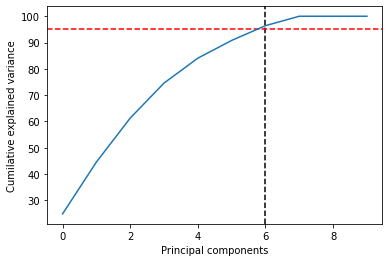

In [28]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=95,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [29]:
# Creating final dataset with 30 columns

FinalPCA=PCA(n_components=6)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5
0,-1.549197,-0.628395,-0.095683,0.523637,-0.315543,0.255545
1,3.156084,1.732145,0.101511,-0.154679,-0.556527,-0.295732
2,0.455716,-1.295524,-0.470517,-1.582920,-0.962708,0.033561
3,1.562384,-0.519725,1.207399,-1.444699,0.218653,0.459319
4,-1.695137,0.025692,0.119461,-0.279331,-0.152659,-0.303024
...,...,...,...,...,...,...
886,-1.321901,0.195795,0.563313,-0.162404,-0.193664,0.458458
887,1.279609,-0.685713,0.681613,-1.546891,-0.686827,1.196194
888,1.311842,-2.339265,0.023235,-0.240064,-0.047984,-1.163909
889,0.594630,2.700957,-0.064868,1.108926,-0.914673,0.203548


In [30]:
df=FinalData2

In [31]:
#analysing data
df.describe()

,0,1,2,3,4,5
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,3.115104e-17,-7.077516e-17,-2.541925e-17,-7.434195e-17,-3.090183e-17,2.286486e-17
std,1.575655e+00,1.404976e+00,1.293814e+00,1.155457e+00,9.739016e-01,8.215718e-01
min,-1.772987e+00,-4.418469e+00,-3.752156e+00,-2.636358e+00,-2.390993e+00,-3.713686e+00
25%,-1.393995e+00,-6.866598e-01,-2.503307e-01,-6.923710e-01,-6.036801e-01,-4.680405e-01
50%,-4.230506e-01,-9.443200e-02,8.410350e-02,-1.065407e-01,-1.849384e-01,6.047602e-02
75%,1.210284e+00,7.820911e-01,6.684464e-01,4.638196e-01,4.249972e-01,4.848997e-01
max,6.265918e+00,4.462596e+00,4.236595e+00,4.636676e+00,3.842129e+00,3.964435e+00


observations 

1.891 rows present

2.mean and median difference is present in siblings,parch,fare, hence showing outliers

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
 2   2       891 non-null    float64
 3   3       891 non-null    float64
 4   4       891 non-null    float64
 5   5       891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [33]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [34]:
#splitting data
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [35]:
y_train.head()

578    0
323    1
654    0
157    0
692    1
Name: Survived, dtype: int64

In [36]:
#Finding best random state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.874439461883408 on Random State 150


In [37]:
  x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=150)

In [38]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.874439461883408
[[122  12]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       134
           1       0.86      0.82      0.84        89

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223



In [39]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8475336322869955
[[116  18]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       134
           1       0.80      0.82      0.81        89

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223



In [40]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.852017937219731
[[122  12]
 [ 21  68]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       134
           1       0.85      0.76      0.80        89

    accuracy                           0.85       223
   macro avg       0.85      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223



In [41]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8789237668161435
[[128   6]
 [ 21  68]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       134
           1       0.92      0.76      0.83        89

    accuracy                           0.88       223
   macro avg       0.89      0.86      0.87       223
weighted avg       0.88      0.88      0.88       223



In [42]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7867679367271357
Cross validation score of Decision Tree model : 0.7766932395957566
Cross validation score of Random Forest model : 0.8081099742640137
Cross validation score of SVC model : 0.674615529470843


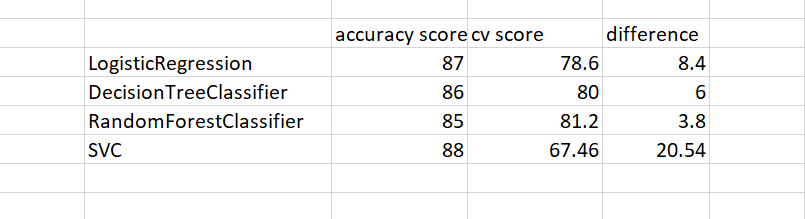

Difference is least in RandomForestClassifier, hence it is the best model

In [43]:
#HyperParameter tuning
from sklearn.model_selection import GridSearchCV 
paramters={'n_estimators':[2,3,4,5],
           'criterion':['gini','entropy'],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5,6],
           'max_leaf_nodes':[2,3,4,5,10],
}

GCV=GridSearchCV(RandomForestClassifier(),paramters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]})

In [44]:
GCV.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 5}

In [45]:
mod=RandomForestClassifier(criterion='entropy',max_leaf_nodes=10,min_samples_leaf=2,min_samples_split=4,n_estimators=2)

In [46]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

82.0627802690583


In [47]:
#Saving of model
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
filename='finalized_model.pickle'
pickle.dump(random_forest_model,open(filename,'wb'))

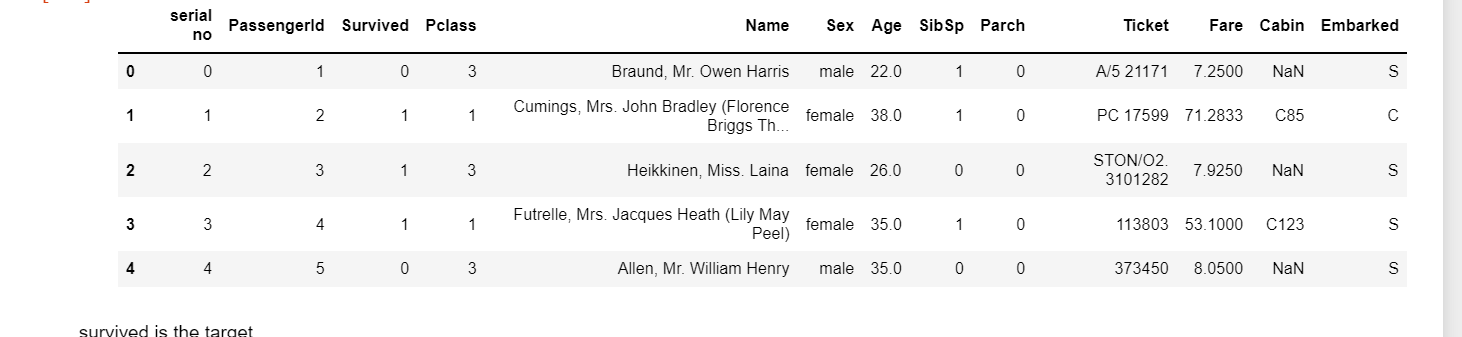

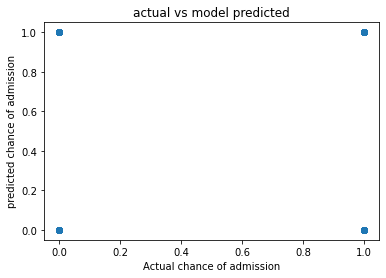

In [49]:
#Adjusted accuracy
random_forest_model.score(x_train,y_train)
y_pred=random_forest_model.predict(x_test)
plt.scatter(y_test,y_pred)

plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [ ]:
print('Precision =' , 10332/(10332+1286))